In [1]:
def getData(data):
    
    lines = data.readlines() 
    
    wavelength = []
    reflect = []
    
    for value in lines:

        wl = float(value.split()[0])
        w2 = float(value.split()[1])
        wavelength.append(wl)
        reflect.append(w2)
    
    return wavelength, reflect


def clipIron(dataWave, dataRef, startVal, endVal):
    
    tempArrayWave = []
    tempArrayRef = []
    
    for i in range(len(dataWave)):
        
        if( dataWave[i] > startVal and dataWave[i] < endVal ):
            
            tempArrayWave.append(dataWave[i])
            tempArrayRef.append(dataRef[i])
            
    return np.asarray(tempArrayWave), np.asarray(tempArrayRef)

def LinearFunc(x, A, B):
    y = A*x + B
    return y

In [3]:
import matplotlib.pyplot as plt 
import glob
from scipy.optimize import curve_fit
import numpy as np


# data = open('MixedSpectrum_or1so0_um.txt','r')
# orwave, orref = getData(data)
# data.close()

# data = open('MixedSpectrum_bl1so0_um.txt','r')
# blwave, blref = getData(data)
# data.close()


data = open('ironoxide.txt','r')
ironwave, ironref = getData(data)

ironwave = np.asarray(ironwave)
ironref = np.asarray(ironref)

data.close()


data = open('ironHydroxide.txt','r')
irhywave, irhyref = getData(data)

irhywave = np.asarray(irhywave)
irhyref = np.asarray(irhyref)

data.close()


data = open('Iron_Oxide_SA.txt','r')
ironSAwave, ironSAref = getData(data)

ironSAwave = np.asarray(ironSAwave)
ironSAref = np.asarray(ironSAref)

data.close()


data = open('Iron_Oxide_GA.txt','r')
ironGAwave, ironGAref = getData(data)

ironGAwave = np.asarray(ironGAwave)
ironGAref = np.asarray(ironGAref)

data.close()

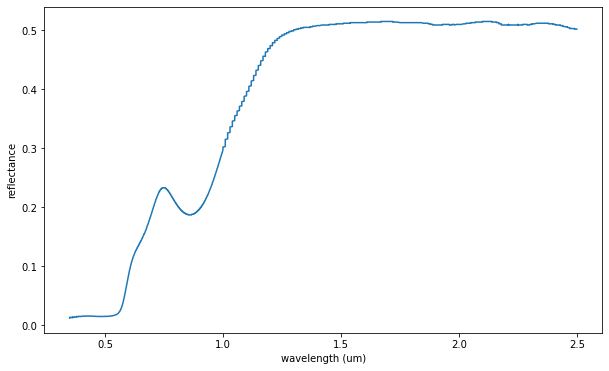

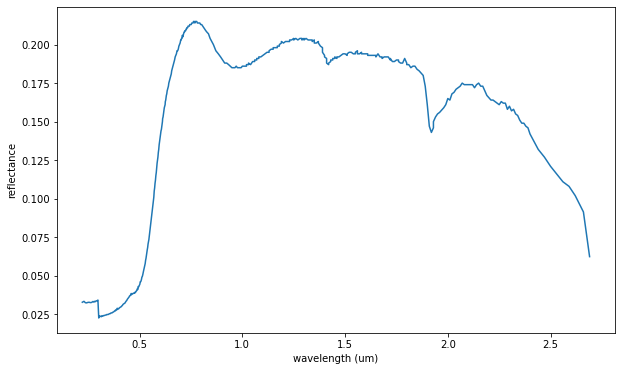

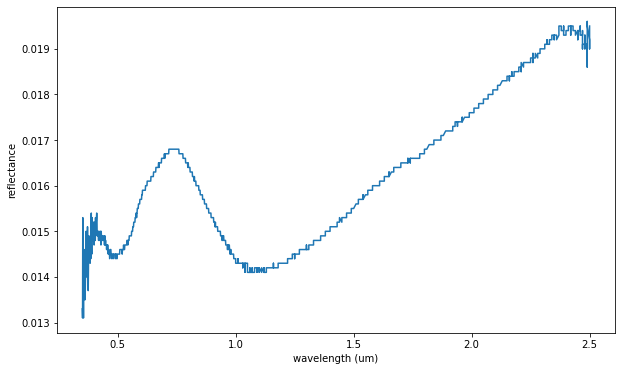

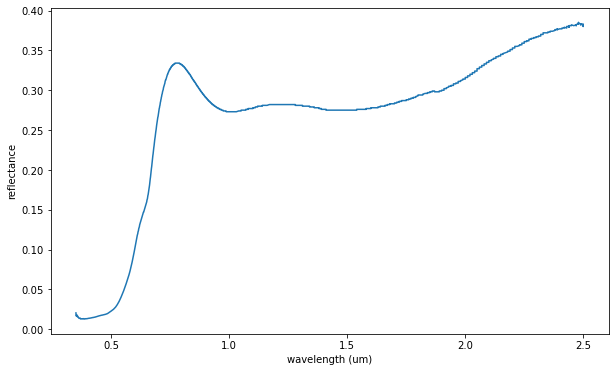

In [4]:
plt.figure(figsize=(10,6))
plt.plot(ironwave, ironref)
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(irhywave, irhyref)
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(ironGAwave, ironGAref)
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(ironSAwave, ironSAref)
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.show()


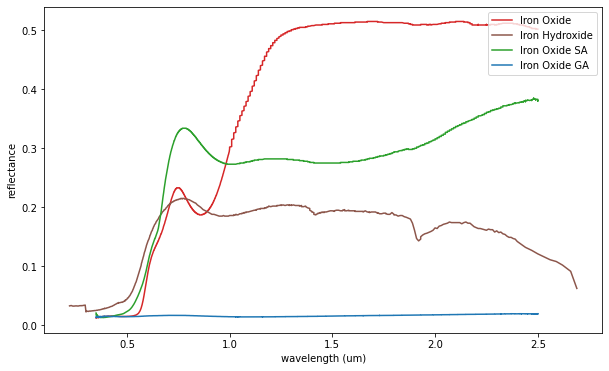

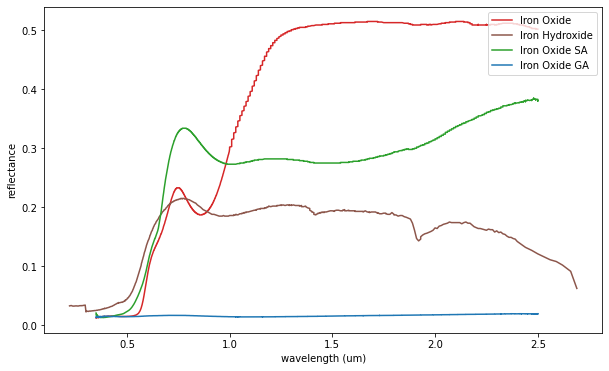

In [5]:
plt.figure(figsize=(10,6))
pt = plt.subplot(111)
pt.plot(ironwave, ironref, 'tab:red', label = "Iron Oxide")
#pt.plot(orwave, orref, 'tab:orange', label = "Orangemat")
pt.plot(irhywave, irhyref, 'tab:brown', label = "Iron Hydroxide")
pt.plot(ironSAwave, ironSAref, 'tab:green', label = "Iron Oxide SA")
pt.plot(ironGAwave, ironGAref, 'tab:blue', label = "Iron Oxide GA")
plt.legend(loc=1)
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.show()

plt.figure(figsize=(10,6))
pt = plt.subplot(111)
pt.plot(ironwave, ironref, 'tab:red', label = "Iron Oxide")
#pt.plot(blwave, blref, 'k', label = "Blackmat")
pt.plot(irhywave, irhyref, 'tab:brown', label = "Iron Hydroxide")
pt.plot(ironSAwave, ironSAref, 'tab:green', label = "Iron Oxide SA")
pt.plot(ironGAwave, ironGAref, 'tab:blue', label = "Iron Oxide GA")
plt.legend(loc=1)
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.show()

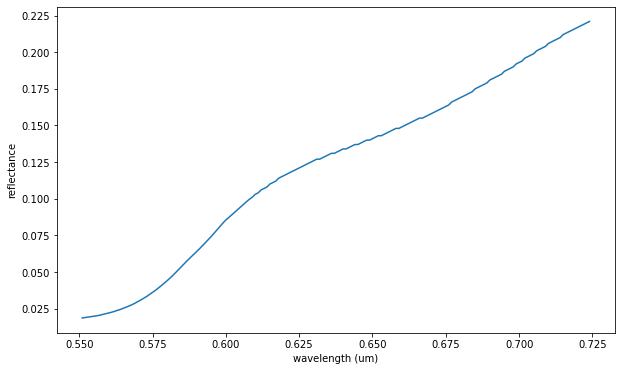

1.191042569630121
-0.6366333163001217


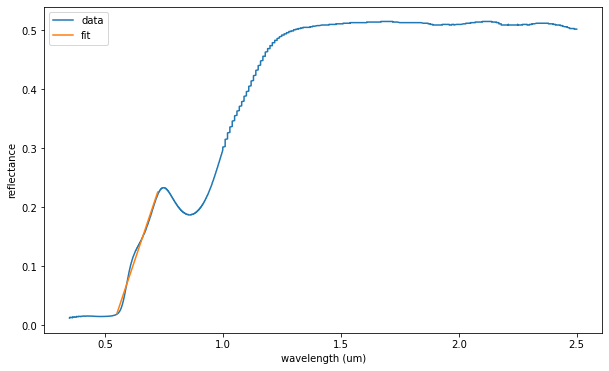

In [23]:
ironwaveRE, ironrefRE = clipIron(ironwave, ironref, 0.55, 0.725 )
ironwaveRE2, ironrefRE2 = clipIron(ironwave, ironref, 0.8, 1.25 )
#do the second slope
plt.figure(figsize=(10,6))
plt.plot(ironwaveRE, ironrefRE)
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.show()

parameters, covariance = curve_fit(LinearFunc, ironwaveRE, ironrefRE)

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

fit_y = LinearFunc(ironwaveRE, fit_A, fit_B)

plt.figure(figsize=(10,6))
plt.plot(ironwave, ironref, label='data')
plt.plot(ironwaveRE, fit_y, '-', label='fit')
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.legend()
plt.show()

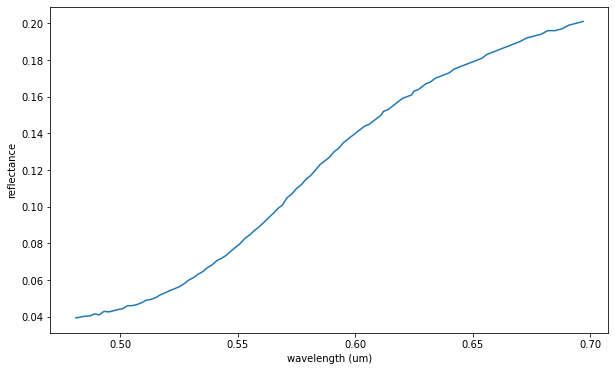

0.8907358204143991
-0.40238568006252673


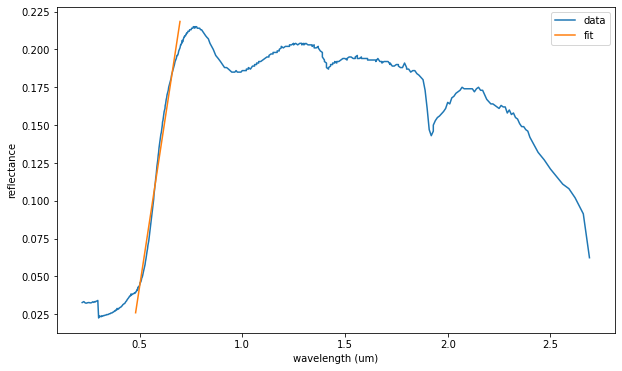

In [25]:
irhywaveRE, irhyrefRE = clipIron(irhywave, irhyref, 0.48, 0.70 )

plt.figure(figsize=(10,6))
plt.plot(irhywaveRE, irhyrefRE)
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.show()

parameters, covariance = curve_fit(LinearFunc, irhywaveRE, irhyrefRE)

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

fit_y = LinearFunc(irhywaveRE, fit_A, fit_B)

plt.figure(figsize=(10,6))
plt.plot(irhywave, irhyref, label='data')
plt.plot(irhywaveRE, fit_y, '-', label='fit')
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.legend()
plt.show()

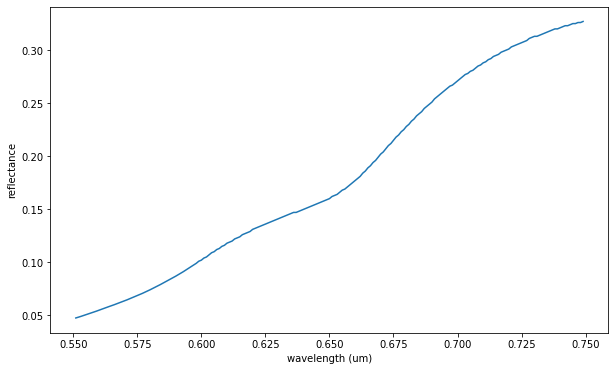

1.5583592188465953
-0.8319269596152556


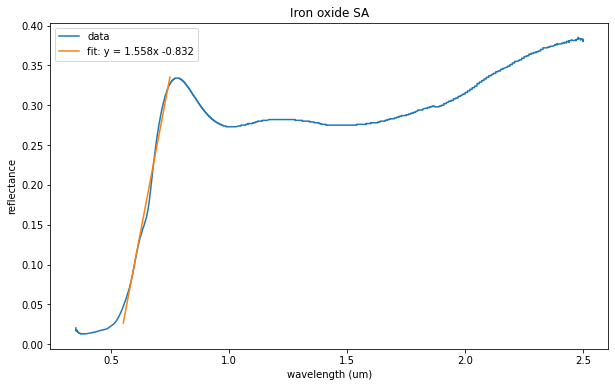

In [26]:
ironSAwaveRE, ironSArefRE = clipIron(ironSAwave, ironSAref, 0.55, 0.75 )

plt.figure(figsize=(10,6))
plt.plot(ironSAwaveRE, ironSArefRE)
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.show()

parameters, covariance = curve_fit(LinearFunc, ironSAwaveRE, ironSArefRE)

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

fit_y = LinearFunc(ironSAwaveRE, fit_A, fit_B)

plt.figure(figsize=(10,6))
plt.plot(ironSAwave, ironSAref, label='data')
plt.plot(ironSAwaveRE, fit_y, '-', label='fit: y = 1.558x - 0.832')
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.title("Iron oxide SA")
plt.legend()
plt.show()

[0.0475 0.0482 0.049  0.0498 0.0506 0.0514 0.0522 0.0531 0.0539 0.0548
 0.0556 0.0565 0.0574 0.0583 0.0591 0.06   0.0609 0.0618 0.0627 0.0637
 0.0646 0.0656 0.0666 0.0676 0.0686 0.0696 0.0707 0.0718 0.0729 0.0741
 0.0753 0.0765 0.0777 0.079  0.0803 0.0816 0.0829 0.0842 0.0856 0.0869
 0.0883 0.0898 0.0912 0.0928 0.0943 0.0959 0.0974 0.099  0.101  0.102
 0.104  0.105  0.107  0.109  0.11   0.112  0.113  0.115  0.116  0.118
 0.119  0.12   0.122  0.123  0.124  0.126  0.127  0.128  0.129  0.131
 0.132  0.133  0.134  0.135  0.136  0.137  0.138  0.139  0.14   0.141
 0.142  0.143  0.144  0.145  0.146  0.147  0.147  0.148  0.149  0.15
 0.151  0.152  0.153  0.154  0.155  0.156  0.157  0.158  0.159  0.16
 0.162  0.163  0.164  0.166  0.168  0.169  0.171  0.173  0.175  0.177
 0.179  0.181  0.184  0.186  0.189  0.191  0.194  0.196  0.199  0.202
 0.204  0.207  0.21   0.212  0.215  0.218  0.22   0.223  0.225  0.228
 0.23   0.233  0.235  0.238  0.24   0.242  0.245  0.247  0.249  0.251
 0.254  0.256  0.2

ValueError: x and y must have same first dimension, but have shapes (199,) and (1,)

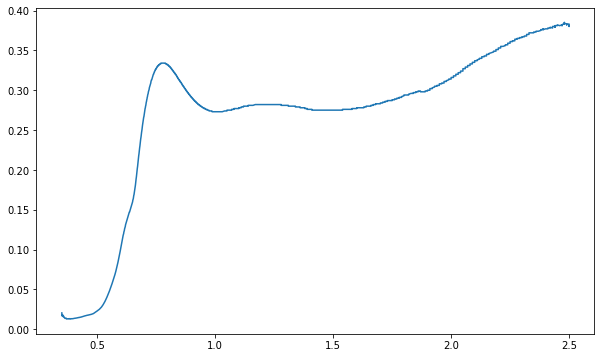

In [35]:
scrub = []
print(ironSArefRE)
scrub = np.arange(ironSArefRE[0], ironSArefRE[len(ironSArefRE) - 1], 1.15, dtype=float)
print(scrub)

# slope = y2 - y1 / x2 - x1

plt.figure(figsize=(10,6))
plt.plot(ironSAwave, ironSAref, label='data')
plt.plot(ironSAwaveRE, scrub, '-', label='fit: y = 1.558x - 0.832')
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.title("Iron oxide SA")
plt.legend()
plt.show()

In [21]:
#dt: 
# ironoxide:     1.1510191872550515
# ironHydroxide: 0.6563271460248854
# Iron_Oxide_SA: 1.5583592188465953
# Iron_Oxide_GA: 0.010788917685621749